In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
sample_size = 1000

#coefficients
b = -1.5
w_1 = 2.0

np.random.normal()


0.463305857466053

In [39]:
np.random.normal(size=10)

array([ 0.26357852, -0.98871681, -0.42850562, -1.50699523,  1.43594647,
       -0.82486759, -1.20435238,  0.27839997, -0.63110597,  0.11329102])

In [40]:
x = np.random.normal(size=sample_size) #create x values

In [43]:
y= b + w_1 * x + np.random.normal(size= sample_size) #create y values

In [45]:
len(x), len(y)

(1000, 1000)

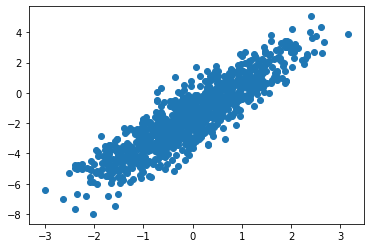

In [44]:
plt.scatter(x,y)

## Step 1 

In [46]:
def make_line(x,slope,intercept) :
    ypred= intercept + slope * x
    return ypred


In [47]:
ypred = make_line(x,w_1,b)

### we plot the actual data and the line together

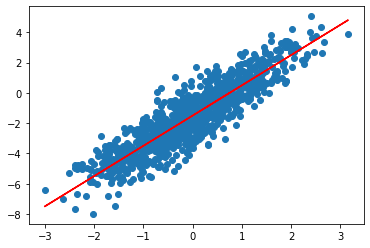

In [49]:
plt.scatter(x,y)
plt.plot(x,ypred,color='r')

In [50]:
##our machine learning algorithm does not know the true relationship

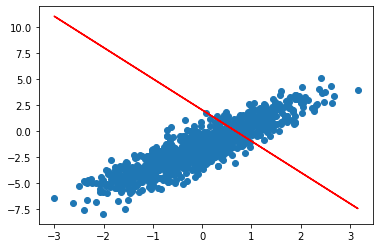

In [53]:
plt.scatter(x,y)
plt.plot(x,make_line(x,-3.0,2.0),color='r')

In [54]:
# Increase the size of the plots
plt.rcParams['figure.figsize'] = (12,6)

# step 2

In [55]:
# a function that calculates the mean squarred error
def mse(ytrue,ypred) :
    error= np.mean((ytrue-ypred)**2)
    return error

In [56]:
mse(y,make_line(x,-3.0,2.0))

38.91007758423591

In [26]:
from sklearn.metrics import mean_squared_error

In [58]:
mean_squared_error(y,make_line(x,-3.0,2.0)) #of course, they have the same value !

38.91007758423591

In [61]:
#testing the function
a = np.array([1.0,1.2,1.4,1.6])
b = np.array([0.2,0.4,0.6,0.8])

assert round(mse(a,b),2)==0.64

# step 3

In [65]:
# Defining the function that approximates the gradient
def calc_gradient(x, ytrue, slope, intercept):

    # Infinitessimal small change applied to each parameter
    dw = 0.0001
    
    ypred = make_line(x, slope, intercept)

    '''tweak first parameter'''
    slope_change = slope + dw
    # calculate predictions using intercept and slope_change
    ypred_slope = make_line(x, slope_change, intercept)
    deriv_slope = (mse(ytrue, ypred_slope) - mse(ytrue, ypred)) / dw

    '''tweak second parameter'''
    intercept_change = intercept + dw
    # calculate predictions using intercept_change and slope
    ypred_intercept = make_line(x, slope, intercept_change)
    deriv_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) / dw

    return [deriv_slope, deriv_intercept] # return both derivations as a list

# step 4

In [79]:
import time
from IPython import display

In [80]:
SLOPE = -1.0 # arbitrary starting value
INTERCEPT = 5.0 # arbitrary starting value
LR = 0.1 # choose a small learning rate
MAX_ITER = 500

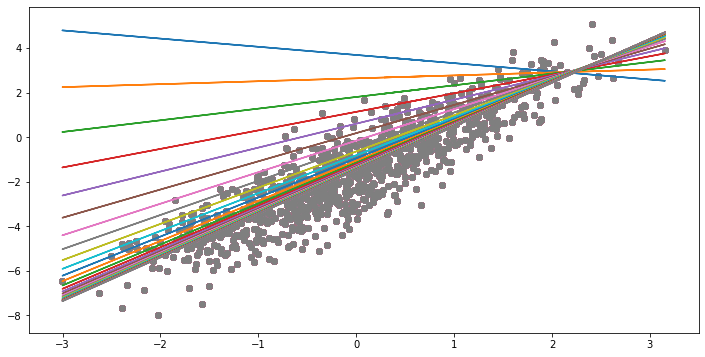

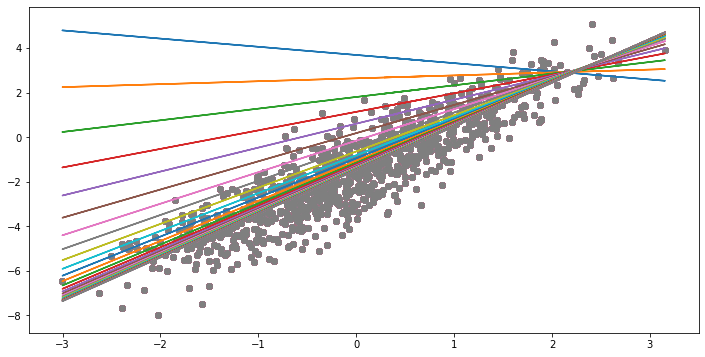

In [81]:
for iteration in range (MAX_ITER):

#1. In each iteration of the loop, calculate the gradient of your loss function with respect to each model parameter.
    gradient = calc_gradient(x, y, SLOPE, INTERCEPT)
 
#2. For each model parameter, multiply the corresponding partial derivative by the learning rate, then negate it.
    update_slope = -LR*gradient[0]
    update_intercept = -LR*gradient[1]

#3. Add the resulting product to the previous value of the model parameter to get the updated parameter value.
#4. Overwrite the values of each parameter with its updated value.
    SLOPE = SLOPE + update_slope
    INTERCEPT = INTERCEPT + update_intercept

#5. Print all variables as you loop to make sure your parameters are converging to their expected values.
    print(f'The slope after iteration {iteration} is {SLOPE}')
    print(f'The intercept after iteration {iteration} is {INTERCEPT}')

#6. Repeat the above steps `MAX_ITER` times.
    plt.scatter(x, y)
    plt.plot(x, make_line(x, SLOPE, INTERCEPT))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.0001)

#7. If the gradient becomes smaller than some pre-determined small threshold value, break out of the loop.
    if abs(gradient[0]) < 0.01 or abs(gradient[1]) < 0.01:
        break

# result 
try some learning rates and look at the performance of gradient descent. And decide which one is best. 